### TensorFlow Linear Function

Let’s derive the function y = Wx + b. We want to translate our input, x, to labels, y.

x would be our list of pixel values, and y would be the logits, one for each digit. Let's take a look at y = Wx, where the weights, W, determine the influence of x at predicting each y.


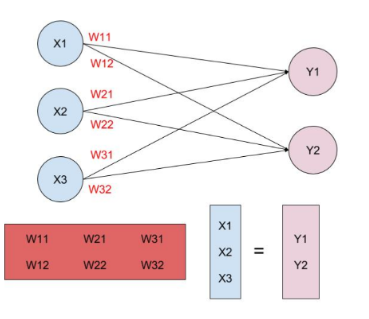

y = Wx allows us to segment the data into their respective labels using a line.

However, this line has to pass through the origin, because whenever x equals 0, then y is also going to equal 0.
We want the ability to shift the line away from the origin to fit more complex data. The simplest solution is to add a number to the function, which we call “bias”.

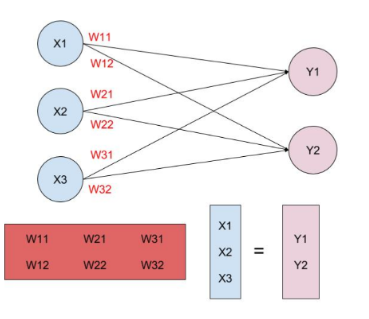



y = Wx + b

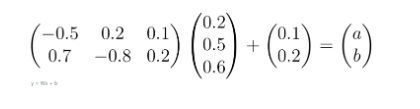


### Transposition

We've been using the y = Wx + b function for our linear function.

But there's another function that does the same thing, y = xW + b. These functions do the same thing and are interchangeable, except for the dimensions of the matrices involved.
To shift from one function to the other, you simply have to swap the row and column dimensions of each matrix. This is called transposition.
For rest of this lesson, we actually use xW + b, because this is what TensorFlow uses.



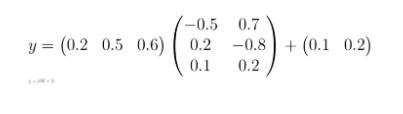

The columns below represents the logits for our two labels.

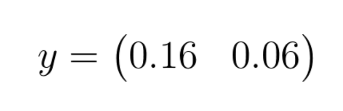

The goal of training a neural network is to modify weights and biases to best predict the labels. In order to use weights and bias, you'll need a Tensor that can be modified. This leaves out tf.placeholder() and tf.constant(), since those Tensors can't be modified. This is where tf.Variable class comes in.



In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# The tf.Variable class creates a tensor with an initial value that can be modified, much like a normal Python variable. 
x = tf.Variable(5)
print ("Tensor flow variable x:- ", x)

# This tensor stores its state in the session, so you must initialize the state of the tensor manually. 
# You'll use the tf.global_variables_initializer() function to initialize the state of all the Variable tensors.
# The tf.global_variables_initializer() call returns an operation that will initialize all TensorFlow variables 
# from the graph. You call the operation using a session to initialize all the variables as shown above. 
init = tf.global_variables_initializer()

print("\n init:- ",init , "type of init:- ", type(init))
print("\n init functionalities:- ",init.__dict__)

with tf.Session() as sess:
    print("\n session -->",sess)
    print("\n session functionalities -->",sess.__dict__)
    sess.run(init)


Tensor flow variable x:-  <tf.Variable 'Variable_2:0' shape=() dtype=int32_ref>

 init:-  name: "init_13"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"
input: "^Variable_2/Assign"
 type of init:-  <class 'tensorflow.python.framework.ops.Operation'>

 init functionalities:-  {'_original_op': None, '_graph': <tensorflow.python.framework.ops.Graph object at 0x00000216737161C0>, '_c_op': <tensorflow.python.client._pywrap_tf_session.TF_Operation object at 0x00000216740CE6B0>, '_inputs_val': None, '_device_code_locations': [<tensorflow.python.framework.traceable_stack.TraceableObject object at 0x0000021674205220>], '_colocation_code_locations': {}, '_control_flow_context': None, '_gradient_function': None, '_is_stateful': False, '_outputs': [], '_id_value': 26}

 session --> <tensorflow.python.client.session.Session object at 0x000002167407AE80>

 session functionalities --> {'_graph': <tensorflow.python.framework.ops.Graph object at 0x00000216737161C0>, '_closed': False, 


Initializing the weights with random numbers from a normal distribution is good practice. Randomizing the weights helps the model from becoming stuck in the same place every time you train it.
Similarly, choosing weights from a normal distribution prevents any one weight from overwhelming other weights. We will use the tf.truncated_normal() function to generate random numbers from a normal distribution.

# tf.truncated_normal()

The tf.truncated_normal() function returns a tensor with random values from a normal distribution whose magnitude is no more than 2 standard deviations from the mean.



In [22]:
n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

print("\n Weights :-", weights)
print("\n Type of weights :-", type(weights))
print("\n Functionalities of weights :-", weights.__dict__)


#Since the weights are already helping prevent the model from getting stuck, we don't need to randomize the bias.
# Let's use the simplest solution, setting the bias to 0.

n_labels = 5
bias = tf.Variable(tf.zeros(n_labels))

print("\n bias :-", bias)
print("\n Type of bias :-", type(bias))
print("\n Functionalities of bias :-", bias.__dict__)




 Weights :- <tf.Variable 'Variable_6:0' shape=(120, 5) dtype=float32_ref>

 Type of weights :- <class 'tensorflow.python.ops.variables.RefVariable'>

 Functionalities of weights :- {'_in_graph_mode': True, '_graph_key': 'graph-key-0/', '_synchronization': <VariableSynchronization.AUTO: 0>, '_aggregation': <VariableAggregation.NONE: 0>, '_trainable': True, '_initial_value': <tf.Tensor 'truncated_normal_2:0' shape=(120, 5) dtype=float32>, '_variable': <tf.Tensor 'Variable_6:0' shape=(120, 5) dtype=float32_ref>, '_name': 'Variable_6:0', '_initializer_op': <tf.Operation 'Variable_6/Assign' type=Assign>, '_snapshot': <tf.Tensor 'Variable_6/read:0' shape=(120, 5) dtype=float32>, '_caching_device': None, '_save_slice_info': None, '_constraint': None}

 bias :- <tf.Variable 'Variable_7:0' shape=(5,) dtype=float32_ref>

 Type of bias :- <class 'tensorflow.python.ops.variables.RefVariable'>

 Functionalities of bias :- {'_in_graph_mode': True, '_graph_key': 'graph-key-0/', '_synchronization': <